In [2]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [3]:
filepath="archive/steam_top_100.csv"
data=pd.read_csv(filepath,sep=";",index_col=0)
data.head()

,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags
Steam id,,,,,,,
730,Counter-Strike: Global Offensive,736875,775266,21 Aug 2012,Very Positive,5993058.0,FPS:Shooter:Multiplayer:Competitive:Action:Tea...
570,Dota 2,580933,649690,9 Jul 2013,Very Positive,1599180.0,Free to Play:MOBA:Multiplayer:Strategy:eSports...
1063730,New World,243815,307146,28 Sep 2021,Mostly Positive,145931.0,Massively Multiplayer:Open World:MMORPG:Advent...
1172470,Apex Legends,121313,245235,4 Nov 2020,Very Positive,338236.0,Free to Play:Battle Royale:Multiplayer:Shooter...
440,Team Fortress 2,104477,111884,10 Oct 2007,Very Positive,821568.0,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...


In [4]:
data.shape

(100, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 730 to 1238810
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Game                100 non-null    object 
 1   Current players     100 non-null    int64  
 2   Peak players today  100 non-null    int64  
 3   Release date        99 non-null     object 
 4   Review summary      99 non-null     object 
 5   Total reviews       99 non-null     float64
 6   Tags                98 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.2+ KB


In [6]:
today=pd.Timestamp.now()
print(today)
data["Release date"]=data["Release date"].fillna(today)
data["Review summary"]=data["Review summary"].fillna("No reviews")
data["Total reviews"]=data["Total reviews"].fillna("No reviews")
data["Tags"]=data["Tags"].fillna("No tags")
data.info()

2025-05-15 12:33:44.384470
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 730 to 1238810
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Game                100 non-null    object
 1   Current players     100 non-null    int64 
 2   Peak players today  100 non-null    int64 
 3   Release date        100 non-null    object
 4   Review summary      100 non-null    object
 5   Total reviews       100 non-null    object
 6   Tags                100 non-null    object
dtypes: int64(2), object(5)
memory usage: 6.2+ KB


In [7]:
data['Release date'] = pd.to_datetime(data['Release date'], dayfirst=False)
data.head()

,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags
Steam id,,,,,,,
730,Counter-Strike: Global Offensive,736875,775266,2012-08-21,Very Positive,5993058.0,FPS:Shooter:Multiplayer:Competitive:Action:Tea...
570,Dota 2,580933,649690,2013-07-09,Very Positive,1599180.0,Free to Play:MOBA:Multiplayer:Strategy:eSports...
1063730,New World,243815,307146,2021-09-28,Mostly Positive,145931.0,Massively Multiplayer:Open World:MMORPG:Advent...
1172470,Apex Legends,121313,245235,2020-11-04,Very Positive,338236.0,Free to Play:Battle Royale:Multiplayer:Shooter...
440,Team Fortress 2,104477,111884,2007-10-10,Very Positive,821568.0,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...


In [8]:
data.describe()

,Current players,Peak players today,Release date
count,100.000000,100.000000,100
mean,39954.370000,52364.190000,2017-09-12 01:05:08.243844608
min,6724.000000,8707.000000,2000-11-01 00:00:00
25%,10018.500000,15032.750000,2015-08-23 00:00:00
50%,18012.000000,24493.000000,2018-03-20 12:00:00
75%,32333.500000,43076.000000,2020-08-18 12:00:00
max,736875.000000,775266.000000,2025-05-15 12:33:44.384470
std,94808.092861,106888.744819,NaN


In [14]:
data['Tags'] = data['Tags'].apply(lambda x: x.split(':') if isinstance(x, str) else x)

df_tags = pd.DataFrame({
    "Game": data["Game"].tolist(),
    "Tags": data["Tags"].tolist()
})

df_team = df_tags.explode("Tags")
df_team

,Game,Tags
0,Counter-Strike: Global Offensive,FPS
0,Counter-Strike: Global Offensive,Shooter
0,Counter-Strike: Global Offensive,Multiplayer
0,Counter-Strike: Global Offensive,Competitive
0,Counter-Strike: Global Offensive,Action
...,...,...
99,Battlefield™ V,Atmospheric
99,Battlefield™ V,Battle Royale
99,Battlefield™ V,Violent
99,Battlefield™ V,Sexual Content


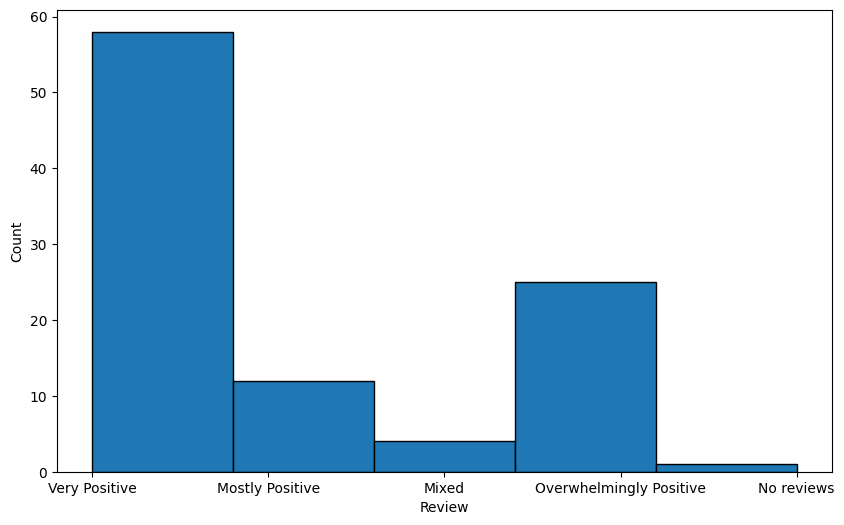

In [15]:
plt.figure(figsize=(10,6))
plt.hist(data['Review summary'], edgecolor = "black" , bins=len(data['Review summary'].value_counts().values))
plt.xlabel("Review")
plt.ylabel("Count")
plt.xticks()
plt.show()

In [ ]:
list_genres = pd.DataFrame(df_tags['Tags'])
count_genres = list_genres.value_counts().plot(kind='bar')

TypeError: unhashable type: 'list'